In [452]:
import pandas as pd 
import numpy as np                    

import matplotlib.pyplot as plt       
import seaborn as sns                 

from scipy.stats import skew          
import scipy.stats as stats      

from sklearn.preprocessing import LabelEncoder

## 1) Dataset Information

In [453]:
df = pd.read_csv("C:/Users/USER/Desktop/books.csv")
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652.0,2095690.0,27591.0,9/16/2006,Scholastic Inc.;;;
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870.0,2153167.0,29221.0,9/1/2004,Scholastic Inc.;;;
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352.0,6333.0,244.0,11/1/2003,Scholastic;;;
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435.0,2339585.0,36325.0,5/1/2004,Scholastic Inc.;;;
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690.0,41428.0,164.0,9/13/2004,Scholastic;;;


In [454]:
df.shape

(11127, 12)

In [455]:
df.isnull().sum()

bookID                 0
title                 33
authors               33
average_rating        33
isbn                  33
isbn13                33
language_code         33
  num_pages           33
ratings_count         33
text_reviews_count    33
publication_date      33
publisher;;;          33
dtype: int64

We have to deal with null null values

In [456]:
df.dtypes

bookID                 object
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
  num_pages           float64
ratings_count         float64
text_reviews_count    float64
publication_date       object
publisher;;;           object
dtype: object

We should convert some categorical values to numeric values such as publication date as Machine learning models usually work with numeric values

In [457]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11094.000000,1.109400e+04,11094.000000,1.109400e+04,11094.000000
mean,3.935026,9.759826e+12,336.543537,1.798750e+04,543.304309
std,0.346458,4.435532e+11,241.313733,1.126427e+05,2579.856004
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.050000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.490000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.018750e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


1. The number of pages contains the minimum value as 1 which is not reasonable number for books we will investigate this case. 
2. We also see avarage rating minimum 0 which is a rare case in GoodReads, so we need to handle this case too. 
3. The mean and median values for ratings_count	and text_reviews_count columns suggest that there is a right skewed distribution. 

In [458]:
zero_page_books = df[df['  num_pages'] == 0]
zero_page_books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
306,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9.780802e+12,eng,0.0,22.0,4.0,1/1/2005,Moody Publishers;;;
853,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9.781400e+12,eng,0.0,3.0,0.0,1/1/2003,Tantor Media;;;
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9.780744e+12,eng,0.0,7.0,2.0,10/3/2006,Simon Schuster Audio;;;
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9.780744e+12,eng,0.0,12.0,1.0,10/1/2003,Simon & Schuster Audio;;;
1230,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9.780739e+12,eng,0.0,91.0,16.0,3/28/2006,Random House Audio;;;


In [459]:
df['  num_pages'].value_counts().sort_index().head(10) 
#the results below means we have 11 books with 1 page, 15 books with 2 pages and soon. These are probably outliers, so we will drop them 

  num_pages
0.0    75
1.0    11
2.0    15
3.0    19
4.0    11
5.0    16
6.0    20
7.0     6
8.0    10
9.0    11
Name: count, dtype: int64

The results above mean that we have 11 books with 1 page, 15 books with 2 pages and soon. These are probably outliers, so we will drop them. 

In [460]:
df[df['  num_pages'] > 2000][['title', 'authors', '  num_pages']]

,title,authors,num_pages
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,2690.0
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,3342.0
1053,The Complete Anne of Green Gables Boxed Set (A...,L.M. Montgomery,2088.0
5616,Study Bible: NIV,Anonymous,2198.0
6260,The J.R.R. Tolkien Companion and Guide,Christina Scull/Wayne G. Hammond,2264.0
6500,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,6576.0
6805,The Second World War,Winston S. Churchill/John Keegan,4736.0
6825,Summa Theologica 5 Vols,Thomas Aquinas,3020.0
7865,Harrison's Principles of Internal Medicine,Dennis L. Kasper/Dan L. Longo/Stephen L. Hause...,2751.0
9933,Goodman & Gilman's the Pharmacological Basis o...,Laurence L. Brunton/John S. Lazo/Keith L. Parker,2021.0


As you can observe from this dataset, the books with the number of pages > 2000 are usually collections, Boxed Set books or Anthologies. So we will label them later I dont want to drop them or do capping because for example Harry Potter Collection (Harry Potter #1-6)	is so popular that removing it would hurt our purpose

In [461]:
duplicates = df.duplicated(subset=['title', 'authors'], keep=False)
df[duplicates].sort_values(by=['title', 'authors']).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
1574,5415,'Salem's Lot,Stephen King,4.02,0965772411,9.780966e+12,eng,405.0,1039.0,130.0,10/17/1975,Doubleday;;;
1576,5419,'Salem's Lot,Stephen King,4.02,0451092317,9.780451e+12,en-US,427.0,178.0,35.0,11/13/1979,Signet;;;
1577,5420,'Salem's Lot,Stephen King,4.02,0340770538,9.780341e+12,eng,586.0,25.0,6.0,10/6/2010,Hodder & Stoughton Ltd;;;
5302,19137,'Salem's Lot,Stephen King,4.02,0451098277,9.780451e+12,eng,817.0,18.0,3.0,8/1/1976,Signet;;;
9253,36303,'Salem's Lot,Stephen King,4.02,0451139690,9.780451e+12,eng,427.0,186.0,22.0,8/1/1976,Signet;;;
1573,5414,'Salem's Lot,Stephen King/Ron McLarty,4.02,0743536967,9.780744e+12,eng,17.0,227.0,54.0,1/19/2004,Simon & Schuster Audio;;;
5300,19135,'Salem's Lot,Stephen King/Ron McLarty,4.02,0743536959,9.780744e+12,en-US,0.0,56.0,5.0,1/19/2004,Simon & Schuster Audio;;;
9134,35552,A Hard Day's Write: The Stories Behind Every B...,Steve Turner,4.18,0060844094,9.780061e+12,eng,224.0,156.0,10.0,10/18/2005,It Books;;;
9146,35666,A Hard Day's Write: The Stories Behind Every B...,Steve Turner,4.18,0062736981,9.780063e+12,eng,224.0,2072.0,100.0,11/1/1999,HarperResource;;;
1164,3873,A History of God: The 4 000-Year Quest of Juda...,Karen Armstrong,3.87,0517223120,9.780517e+12,eng,460.0,38915.0,1087.0,3/2/2004,Gramercy Books;;;


As you can see from the dataframe above, we have 600+ entries as a dublicate. I will cope with this issue by only keeping the lates version of each book later

## 2) Dataset Cleaning 

In [462]:
# Step 1: Keep publication year only for the publication date column 
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce').dt.year 

# Step 2 : Remove the rows with null values 
df.columns = df.columns.str.strip() 

# Step 3: Clean up the column names just in case
df = df.dropna()

# Step 4: Drop the columns that adds no value to the model training
df.drop(columns=['bookID', 'isbn', 'isbn13', 'publisher;;;'], inplace=True)

# Step 5: We drop the books with the authors NOT A BOOK and the number of pages below 30 
df = df[df['num_pages'] > 30]
df = df[~df['authors'].str.upper().eq('NOT A BOOK')]

# Step 6: Remove books with 0 ratings or 0 reviews
df = df[(df['ratings_count'] > 0) & (df['text_reviews_count'] > 0)]

# Step 7: Remove books with less than 2 average rating 
df = df[df['average_rating'] >= 2.0].reset_index(drop=True)

# Step 8: Remove dublicates
df = df.sort_values('publication_date', ascending=False) \
       .drop_duplicates(subset=['title', 'authors'], keep='first') \
       .reset_index(drop=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)


df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date
0,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,360.0,35275.0,1370.0,2020.0
1,Object Thinking,David West,3.99,eng,334.0,155.0,21.0,2019.0
2,The Art of Loving,Erich Fromm/Peter D. Kramer/Rainer Funk,4.04,eng,192.0,38148.0,1310.0,2019.0
3,Enthusiasm and Divine Madness,Josef Pieper/Richard Winston/Clara Winston,4.50,eng,125.0,26.0,4.0,2019.0
4,Monster,Walter Dean Myers,3.72,eng,281.0,56171.0,5341.0,2019.0


Let us see the statistics again


In [463]:
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
count,9934.000000,9934.000000,9.934000e+03,9934.000000,9934.000000
mean,3.943805,347.815583,1.843153e+04,569.719146,2000.293940
std,0.281795,239.750291,1.119605e+05,2629.268173,8.036986
min,2.000000,31.000000,1.000000e+00,1.000000,1900.000000
25%,3.780000,208.000000,1.760000e+02,13.000000,1998.000000
50%,3.960000,304.000000,9.950000e+02,59.000000,2003.000000
75%,4.130000,418.750000,5.952500e+03,273.000000,2005.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,2020.000000


In [464]:
df.shape

(9934, 8)

## 3) Visualizations

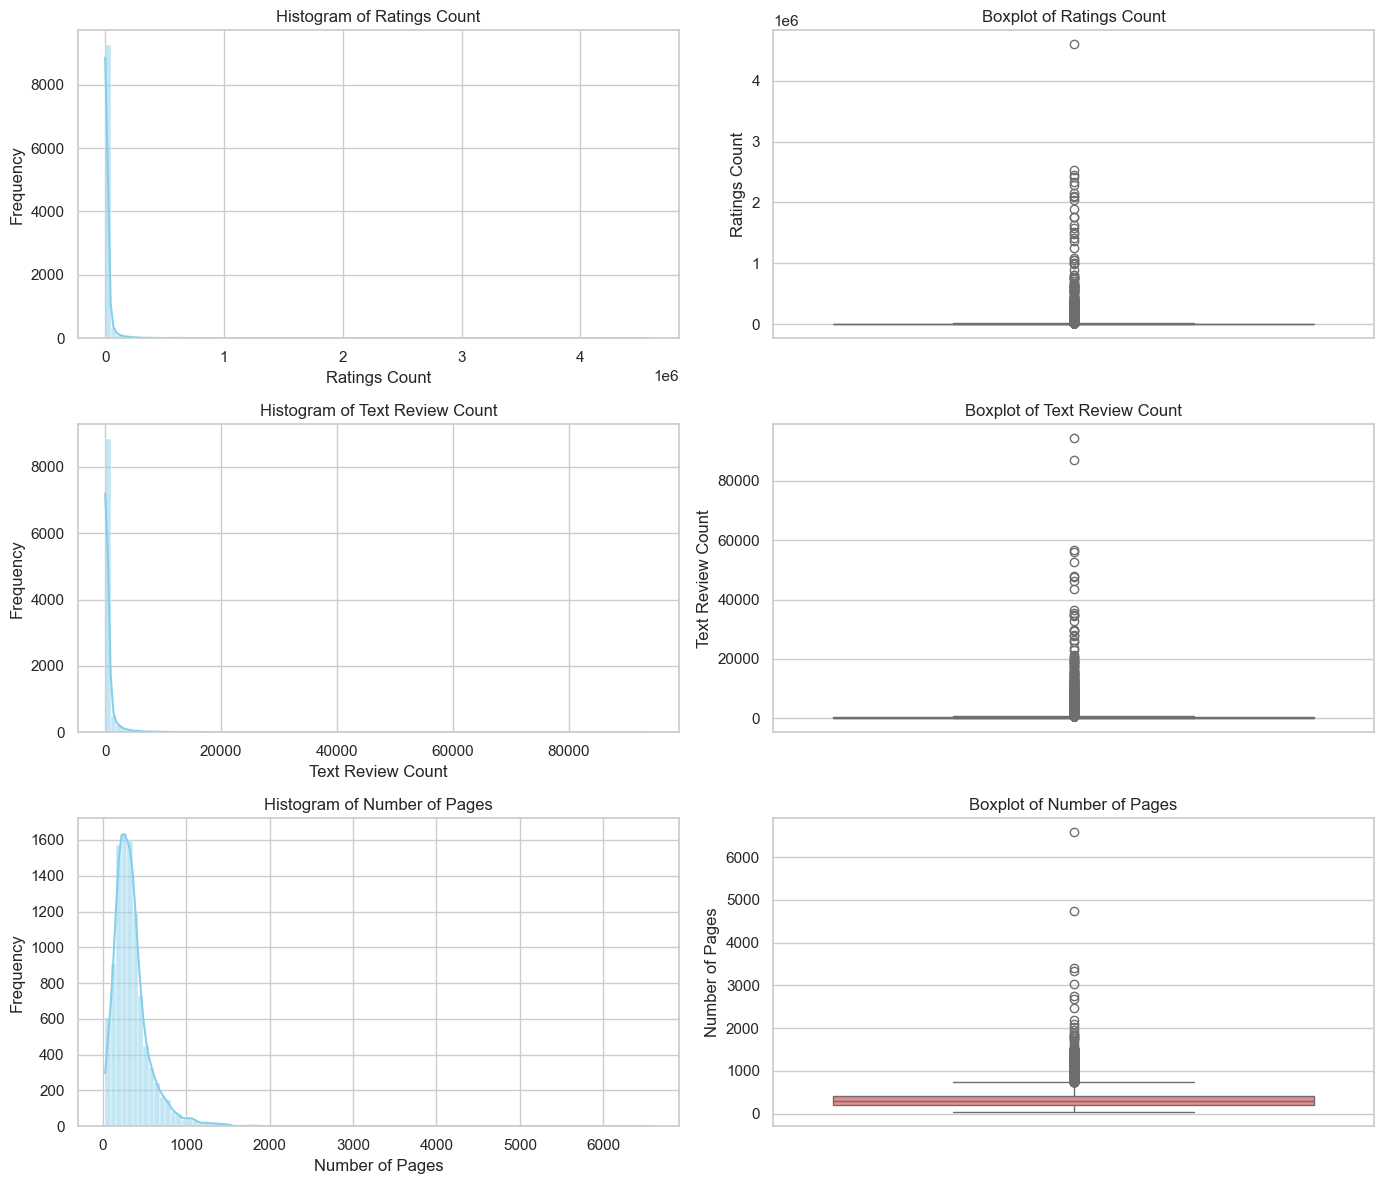

In [465]:
sns.set(style="whitegrid")

features = ['ratings_count', 'text_reviews_count', 'num_pages']
titles = ['Ratings Count', 'Text Review Count', 'Number of Pages']
colors = ['skyblue', 'skyblue', 'skyblue']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

for i, (feature, title, color) in enumerate(zip(features, titles, colors)):
    # Histogram
    sns.histplot(df[feature], bins=100, kde=True, ax=axs[i, 0], color=color)
    axs[i, 0].set_title(f'Histogram of {title}')
    axs[i, 0].set_xlabel(title)
    axs[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(y=df[feature], ax=axs[i, 1], color='lightcoral')
    axs[i, 1].set_title(f'Boxplot of {title}')
    axs[i, 1].set_ylabel(title)

plt.tight_layout()
plt.show()


Before applying any transformation, it's essential to understand the distribution of our features. From the visualization (see image above), we observe the following:

- **Ratings Count**, **Text Review Count**, and **Number of Pages** all show highly **right-skewed** distributions.
- The **histograms** show that most values are concentrated near the lower end, while a small number of extremely large values stretch the scale far to the right.
- In the **boxplots**, the whiskers appear very compressed, with numerous individual circles representing **outliers**. 

This compression is not an error—it's a **clear visual indicator** of how extreme the outliers are. The higher values in `'ratings_count'` and other features are pushing the rest of the data into a narrow space, making interpretation and modeling difficult.


In [466]:
df['log_ratings_count'] = np.log1p(df['ratings_count'])
df['log_text_review_count'] = np.log1p(df['text_reviews_count'])
df['log_num_pages'] = np.log1p(df['num_pages'])

To reduce the skewness and minimize the influence of extreme outliers, we apply a **log transformation** using `log(1 + x)` (to safely handle zero values). This transformation:

- Compresses large values,
- Spreads out smaller values,
- Makes the distribution **more symmetric and normalized**.

Applying this transformation will allow us to better visualize and analyze the data. Let's proceed with the transformation and inspect the new distributions to observe the impact.

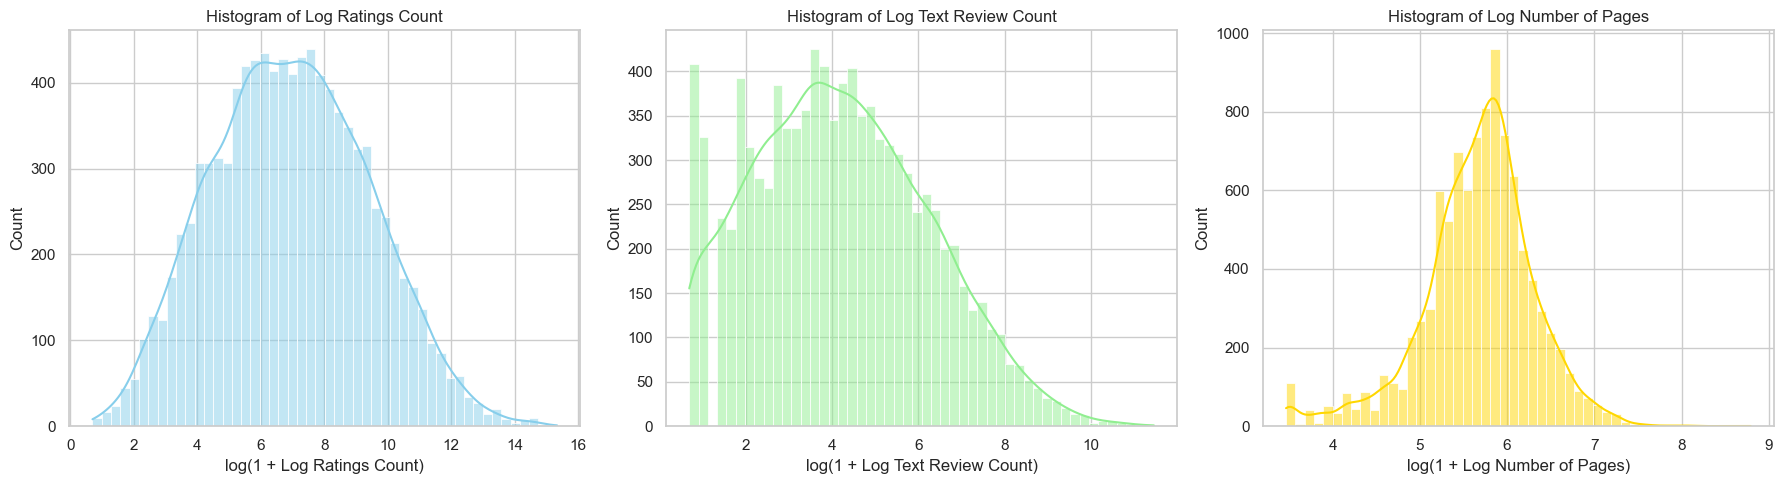

In [467]:
sns.set(style="whitegrid")

log_features = ['log_ratings_count', 'log_text_review_count', 'log_num_pages']
titles = ['Log Ratings Count', 'Log Text Review Count', 'Log Number of Pages']
colors = ['skyblue', 'lightgreen', 'gold']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, (feature, title, color) in enumerate(zip(log_features, titles, colors)):
    sns.histplot(df[feature], bins=50, kde=True, ax=axs[i], color=color)
    axs[i].set_title(f'Histogram of {title}')
    axs[i].set_xlabel(f'log(1 + {title})')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


## 4) Feature Engineering

1. To make it easier for a model to capture the underlying patterns in the data, we will create a new feature: **`book_age`**. This feature will represent how long ago the book was published.

2. The **`authors`** column, in its raw string format, does not provide much value directly. Instead, we will derive a new feature: **`num_authors`**, which counts how many authors contributed to each book.

3. Upon further exploration, we observed that the `num_authors` feature contains some unusual but meaningful values (extreme 51 authors for a book). To handle this, we will categorize books based on the **number of authors** (e.g., solo, collab, group).

4. The **`num_pages`** feature contains extreme values (outliers), which often correspond to collections, box sets, anthologies, or multi-volume editions. We will introduce a new binary feature called **`is_box_set`** to label these cases and simplify modeling.

5. Finally, we will define a **`popularity_class`** feature to categorize books based on their popularity. To determine which feature (e.g., ratings count, review count) best reflects popularity, we will examine the **correlation matrix**.

In [468]:
df[['log_ratings_count', 'log_text_review_count', 'average_rating']].corr()

,log_ratings_count,log_text_review_count,average_rating
log_ratings_count,1.000000,0.953131,0.110238
log_text_review_count,0.953131,1.000000,0.044978
average_rating,0.110238,0.044978,1.000000


**Correlation Matrix Summary**

- `log_ratings_count` and `log_text_review_count` have a **very strong positive correlation** (0.95).
  -  Books with more ratings also tend to have more reviews.
  
- `log_ratings_count` and `average_rating` have a **weak correlation** (0.11).
  -  Popular books (high ratings count) are **not necessarily highly rated**.

- `log_text_review_count` and `average_rating` have an **even weaker correlation** (0.04).
  -  Text reviews are **not related** to how well a book is rated.

 **Conclusion**: 
Use `log_ratings_count` to define **book popularity** — it reflects popularity well and is not biased by rating quality.


In [469]:
# Step 1: Create a new column book_age
df['book_age'] = 2025- df['publication_date']

# Step 2: Create a new column to handle the extreme values for the number of pages
df['is_box_set'] = (df['num_pages'] > 1000).astype(int)

# Step 3: Detect the number of authors for each book and then group them into categories to handle outliers. 
df['num_authors'] = df['authors'].apply(lambda x: len(str(x).split('/')))
def bin_authors(x):
    if x == 1:
        return 'solo'
    elif 2 <= x <= 3:
        return 'collab'
    else:
        return 'group'

df['author_type'] = df['num_authors'].apply(bin_authors)

# Step 4: Define popularity class
def classify_popularity(log_count):
    if log_count < 5.5:
        return 'unpopular'
    elif log_count < 7.5:
        return 'average'
    else:
        return 'popular'

df['popularity_class'] = df['log_ratings_count'].apply(classify_popularity)

After all these process I will safely drop ratings_count', 'text_reviews_count', 'num_pages', 'num_authors', 'publication_date', 'title', 'authors as we have derived meaningfull information from them and we dont neew them any more. 

In [470]:
df = df.drop(['ratings_count', 'text_reviews_count', 'num_pages', 'num_authors', 'publication_date', 'title', 'authors', 'language_code'], axis=1)
df.head()

,average_rating,log_ratings_count,log_text_review_count,log_num_pages,book_age,is_box_set,author_type,popularity_class
0,3.91,10.470958,7.223296,5.888878,5.0,0,solo,popular
1,3.99,5.049856,3.091042,5.814131,6.0,0,solo,unpopular
2,4.04,10.549255,7.178545,5.262690,6.0,0,collab,popular
3,4.50,3.295837,1.609438,4.836282,6.0,0,collab,unpopular
4,3.72,10.936174,8.583355,5.641907,6.0,0,solo,popular


In [471]:
df.describe()

,average_rating,log_ratings_count,log_text_review_count,log_num_pages,book_age,is_box_set
count,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000
mean,3.943805,6.953141,4.198674,5.665438,24.706060,0.020838
std,0.281795,2.465690,2.038324,0.640924,8.036986,0.142847
min,2.000000,0.693147,0.693147,3.465736,5.000000,0.000000
25%,3.780000,5.176150,2.639057,5.342334,20.000000,0.000000
50%,3.960000,6.903747,4.094345,5.720312,22.000000,0.000000
75%,4.130000,8.691734,5.613128,6.039659,27.000000,0.000000
max,5.000000,15.341060,11.453876,8.791334,125.000000,1.000000


In [472]:
# Let us check the imbalance of the popularity class: It is fairly balanced
df['popularity_class'].value_counts()
df['author_type'].value_counts()


author_type
solo      5933
collab    3577
group      424
Name: count, dtype: int64

In [473]:
# Label encode the target variable
le = LabelEncoder()
df['popularity_class'] = le.fit_transform(df['popularity_class'])


# One-hot encode author_type with 3 categories
df = pd.get_dummies(df, columns=['author_type'], drop_first=False).astype(float)
df.head()


,average_rating,log_ratings_count,log_text_review_count,log_num_pages,book_age,is_box_set,popularity_class,author_type_collab,author_type_group,author_type_solo
0,3.91,10.470958,7.223296,5.888878,5.0,0.0,1.0,0.0,0.0,1.0
1,3.99,5.049856,3.091042,5.814131,6.0,0.0,2.0,0.0,0.0,1.0
2,4.04,10.549255,7.178545,5.262690,6.0,0.0,1.0,1.0,0.0,0.0
3,4.50,3.295837,1.609438,4.836282,6.0,0.0,2.0,1.0,0.0,0.0
4,3.72,10.936174,8.583355,5.641907,6.0,0.0,1.0,0.0,0.0,1.0


In [474]:
df.describe()

,average_rating,log_ratings_count,log_text_review_count,log_num_pages,book_age,is_box_set,popularity_class,author_type_collab,author_type_group,author_type_solo
count,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000
mean,3.943805,6.953141,4.198674,5.665438,24.706060,0.020838,1.001711,0.360077,0.042682,0.597242
std,0.281795,2.465690,2.038324,0.640924,8.036986,0.142847,0.766836,0.480046,0.202149,0.490478
min,2.000000,0.693147,0.693147,3.465736,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.780000,5.176150,2.639057,5.342334,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.960000,6.903747,4.094345,5.720312,22.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.130000,8.691734,5.613128,6.039659,27.000000,0.000000,2.000000,1.000000,0.000000,1.000000
max,5.000000,15.341060,11.453876,8.791334,125.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [476]:
desktop_path = "C:/Users/USER/Desktop/cleaned_dataset.xlsx"
df.to_excel(desktop_path, index=False)